In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from matplotlib.ticker import PercentFormatter
from matplotlib.colors import LinearSegmentedColormap
from util import*


### data: ndarray, shape (20640, 8)
Each row corresponding to the 8 feature values in order. If as_frame is True, data is a pandas object.

### target: numpy array of shape (20640,)
Each value corresponds to the average house value in units of 100,000. If as_frame is True, target is a pandas object.

### feature_names: list of length 8
Array of ordered feature names used in the dataset.

### DESCR: string
Description of the California housing dataset.



In [2]:
# Specify the path to download data
download_path = os.getcwd() + "/dataset/"
print(download_path)

/home/zhenglyu/Desktop/git/cme-216-housing-pricing-prediction/dataset/


In [3]:
ds = download_skl_dataset(download_path)

In [4]:
data, target, feature_names, DESCR = data_process(ds)

In [5]:
print(feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
# Split data to training, validation and testset
x_train, y_train, x_val, y_val, x_test, y_test = train_set_prepare(data, target, random_state=100)

In [7]:
cur_path = os.getcwd()

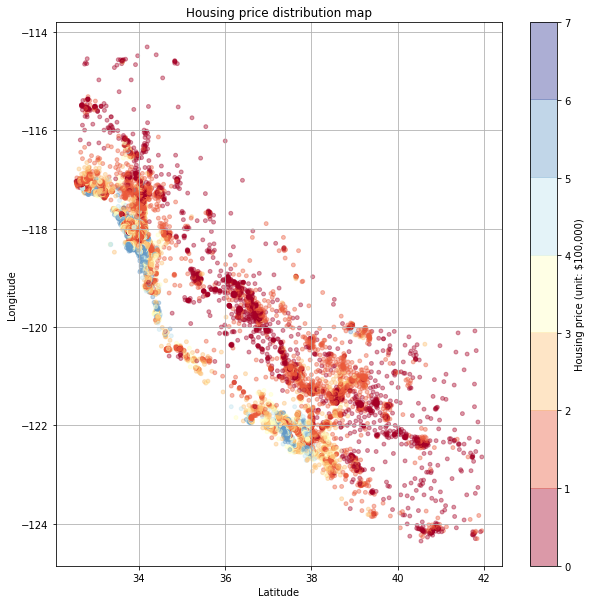

In [12]:
# Visualize whole dataset

save_path = cur_path + '/figures/total_data_set'
land_map(data, target, save_path=save_path, bar_label='Housing price (unit: $100,000)', clim = [0, 7], step = 7)

In [10]:
def feature_hist(data_one, feature_names, label, save_path, data_two=None,data_three=None,data_four=None, title=None):
    fig = plt.figure(figsize=(20,8))
    for ii in range(data_one.shape[1]):   
        index = int(240+ii+1)
        fig.add_subplot(index)
        plt.xlabel(feature_names[ii])
        plt.ylabel('Percentage')
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.hist(data_one[:,ii], weights = np.ones(len(data_one[:,ii])) / len(data_one[:,ii]), alpha = 0.5, label=label[0], bins=50)
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

        if data_two is not None:
            plt.hist(data_two[:,ii], 
                     weights = np.ones(len(data_two[:,ii])) / len(data_two[:,ii]), alpha = 0.3, label=label[1], bins=50)
        if data_three is not None:
            plt.hist(data_three[:,ii], 
                     weights = np.ones(len(data_three[:,ii])) / len(data_three[:,ii]), alpha = 0.2,label=label[2], bins=50)
        if data_four is not None:
            plt.hist(data_four[:,ii], 
                     weights = np.ones(len(data_four[:,ii])) / len(data_four[:,ii]), alpha = 0.1,label=label[3], bins=50)
        
        plt.legend()

    plt.suptitle(title)
    plt.savefig(save_path)

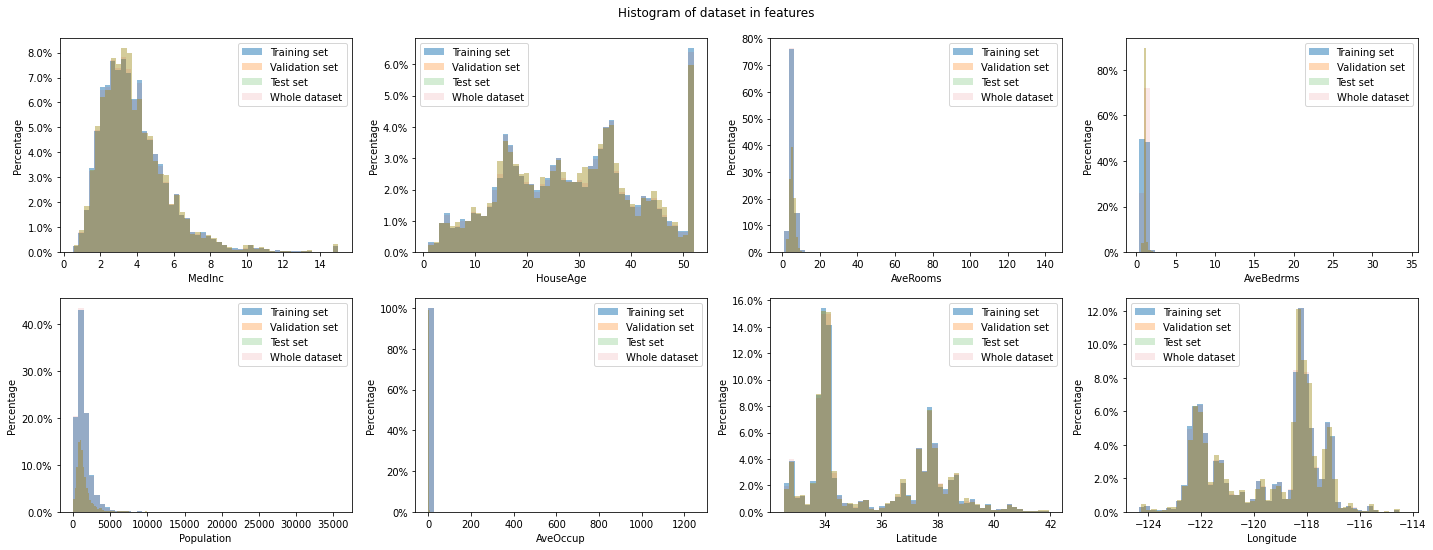

In [11]:
save_path = cur_path + '/figures/hist_data_set'
feature_hist(x_train,feature_names,
            ['Training set', 'Validation set', 'Test set', 'Whole dataset'],
            save_path=save_path,
            data_two=x_val,
            data_three=x_test,
            data_four=data,
            title='Histogram of dataset in features')

### Check correlation

In [12]:
corr_matrix = np.corrcoef(data.transpose())

In [15]:
def plot_correlation(corr_matrix, save_path):
    plt.imshow(corr_matrix, cmap='hot')
    plt.colorbar()
    plt.savefig(save_path)
    plt.show()

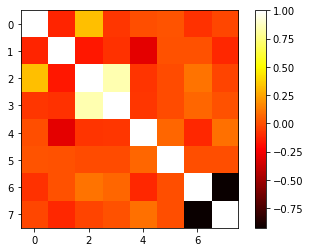

In [16]:
save_path = cur_path + '/figures/correlation'
plot_correlation(corr_matrix, save_path)

## Normalize the data

In [26]:
data_norm, std_data, mean_data = feature_normalization(data, log_flag=False)

In [27]:
# Split data to training, validation and testset
x_train, y_train, x_val, y_val, x_test, y_test = train_set_prepare(data_norm, target, random_state = 100)

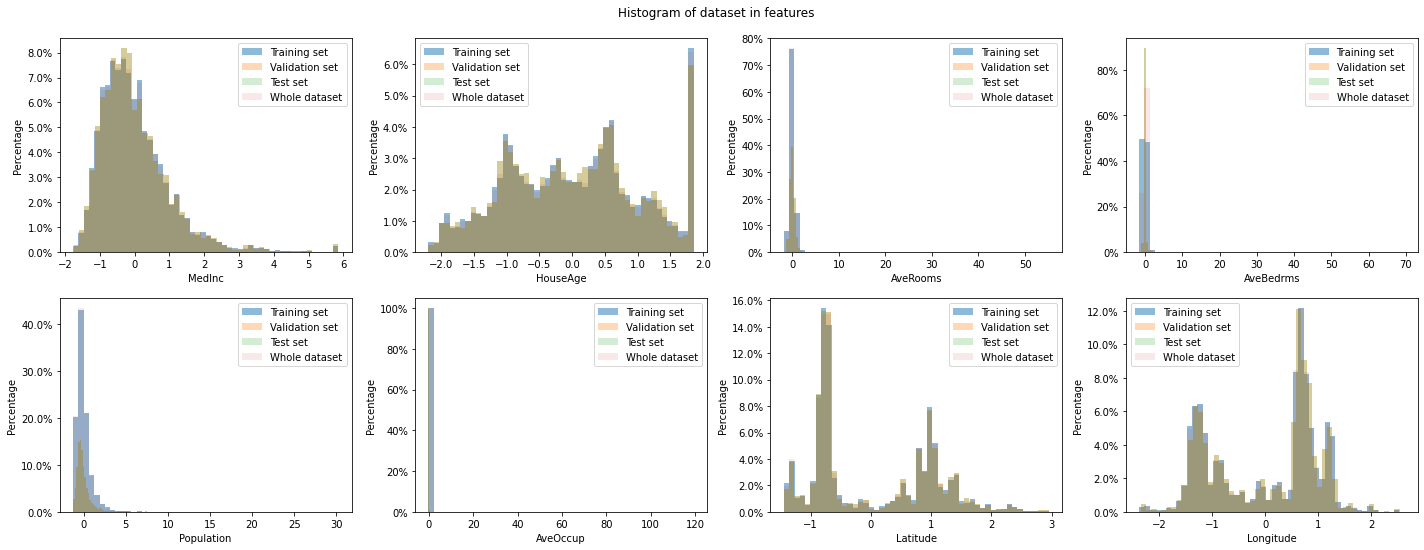

In [28]:
save_path = cur_path + '/figures/hist_data_set_normalized'
feature_hist(x_train,feature_names,
            ['Training set', 'Validation set', 'Test set', 'Whole dataset'],
            save_path=save_path,
            data_two=x_val,
            data_three=x_test,
            data_four=data_norm,
            title='Histogram of dataset in features')

## Log data

In [29]:
data_norm, std_data, mean_data = feature_normalization(data, log_flag=True)

In [30]:
# Split data to training, validation and testset
x_train, y_train, x_val, y_val, x_test, y_test = train_set_prepare(data_norm, target, random_state = 100)

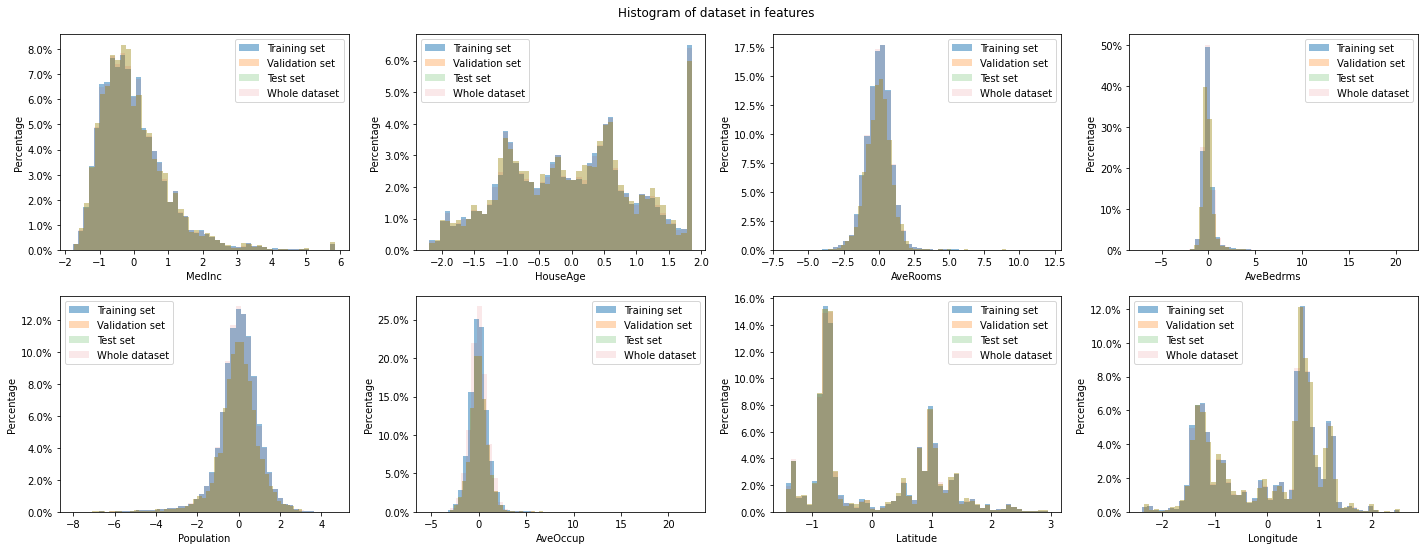

In [31]:
save_path = cur_path + '/figures/hist_data_set_normalized_log'
feature_hist(x_train,feature_names,
            ['Training set', 'Validation set', 'Test set', 'Whole dataset'],
            save_path=save_path,
            data_two=x_val,
            data_three=x_test,
            data_four=data_norm,
            title='Histogram of dataset in features')